In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('Movies.csv')

In [3]:
df

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,5.0,4.0,3,NaN,NaN,4.0
1,Logan,4.0,NaN,3,3.0,NaN,NaN
2,Modesto,NaN,NaN,4,NaN,4.0,4.0
3,Malcolm,NaN,NaN,2,NaN,4.0,NaN
4,Maurice,5.0,4.0,4,2.0,3.0,3.0


Getting the average/mean of the reviews

In [4]:
df.mean()

American Sniper        4.666667
Edge Of Tomorrow       4.000000
Groundhog Day          3.200000
Jurassic World         2.500000
Lost in Translation    3.666667
Lucy                   3.666667
dtype: float64

NaN is appropriate here, NaN is the absense of a value becasue reviewer have yet to see the movie.

If NaN is replaced with '0', it would alter the review average.

## Compare Reviews Score

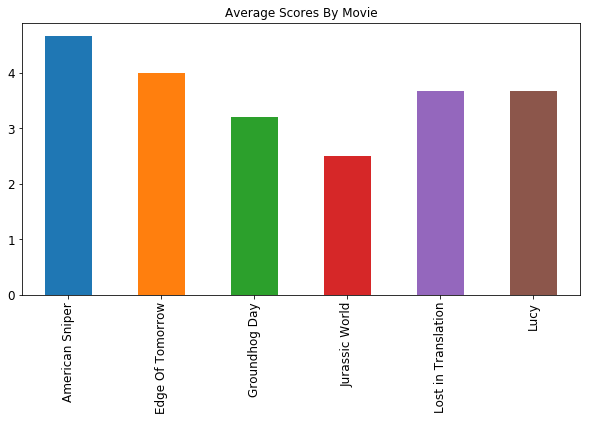

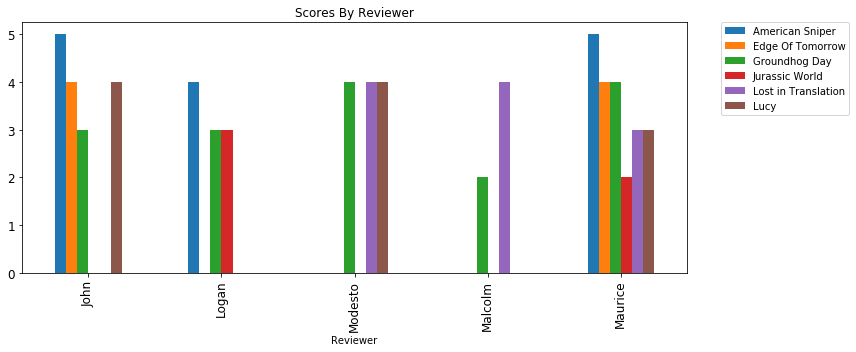

In [5]:
mov_avg = df.mean().plot(kind='bar', x='Reviewer', fontsize=12, figsize=(10, 5))
plt.title('Average Scores By Movie')

rev_avg = df.plot(kind='bar', x='Reviewer', fontsize=12, figsize=(12, 5))
plt.title('Scores By Reviewer')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

We preserve the outliers by doing simple aggragation on the scores given to each movie by each reviewer.

Due to the small dataset of this excercise, this is the best analysis.

Let's break down the average score given by each reviewer.

In [6]:
re = df.set_index('Reviewer').stack().groupby(level=0).mean().to_frame()

Text(0.5,1,'Averge Score By Each Reviewer')

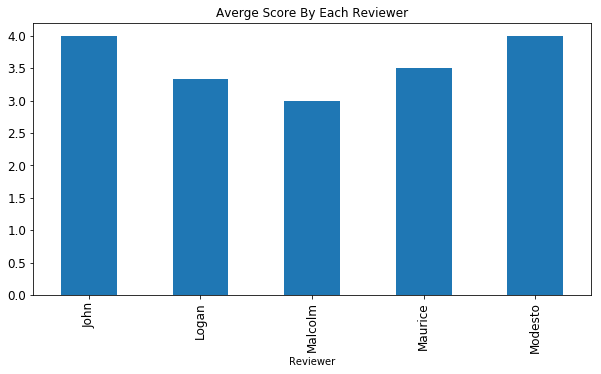

In [7]:
re.plot(kind='bar', legend=False, fontsize=12, figsize=(10, 5))
plt.title('Averge Score By Each Reviewer')

John appears to give the highest scores, followed by Modesto.

## Normalized Data

Let's normalize this dataset.

In [8]:
df

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,5.0,4.0,3,NaN,NaN,4.0
1,Logan,4.0,NaN,3,3.0,NaN,NaN
2,Modesto,NaN,NaN,4,NaN,4.0,4.0
3,Malcolm,NaN,NaN,2,NaN,4.0,NaN
4,Maurice,5.0,4.0,4,2.0,3.0,3.0


NaN have to be converted to '0', before we can normalize this dataframe.

In [9]:
df_norm = df.fillna(0)

In [10]:
df_norm

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,5.0,4.0,3,0.0,0.0,4.0
1,Logan,4.0,0.0,3,3.0,0.0,0.0
2,Modesto,0.0,0.0,4,0.0,4.0,4.0
3,Malcolm,0.0,0.0,2,0.0,4.0,0.0
4,Maurice,5.0,4.0,4,2.0,3.0,3.0


In [11]:
cols_norm = ['American Sniper', 'Edge Of Tomorrow', 'Groundhog Day', 'Jurassic World','Lost in Translation','Lucy']

We will apply the lamba equation for normalization.

In [12]:
df_norm[cols_norm] = df_norm[cols_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Normalized dataframe.

In [13]:
df_norm

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,1.0,1.0,0.5,0.000000,0.00,1.00
1,Logan,0.8,0.0,0.5,1.000000,0.00,0.00
2,Modesto,0.0,0.0,1.0,0.000000,1.00,1.00
3,Malcolm,0.0,0.0,0.0,0.000000,1.00,0.00
4,Maurice,1.0,1.0,1.0,0.666667,0.75,0.75


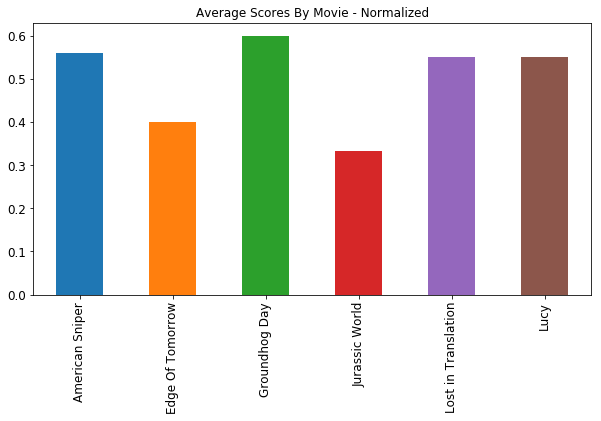

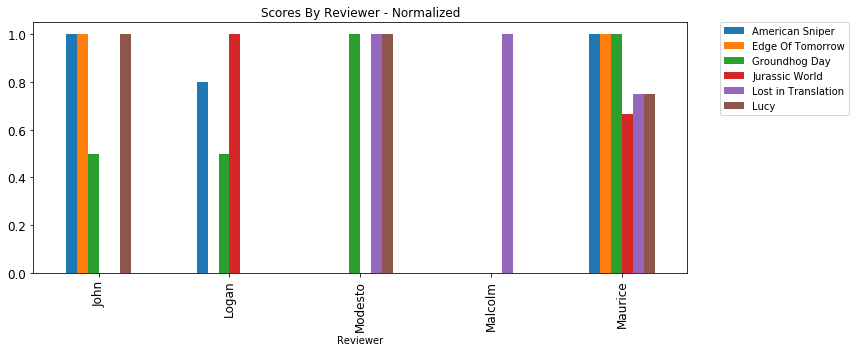

In [14]:
df_norm.mean().plot(kind='bar', x='Reviewer', fontsize=12, figsize=(10, 5))
plt.title('Average Scores By Movie - Normalized')

df_norm.plot(kind='bar', x='Reviewer', fontsize=12, figsize=(12, 5))
plt.title('Scores By Reviewer - Normalized')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

We lose the outliers here. I don't think this is a good analysis for this dataset.

If we were doing a more scientific analysis on large datasets of statistics then normalization would make more sense.

In [15]:
re_norm = df_norm.set_index('Reviewer').stack().groupby(level=0).mean().to_frame()

In [16]:
re_norm

,0
Reviewer,
John,0.583333
Logan,0.383333
Malcolm,0.166667
Maurice,0.861111
Modesto,0.500000


Text(0.5,1,'Averge Score By Each Reviewer - Normalized')

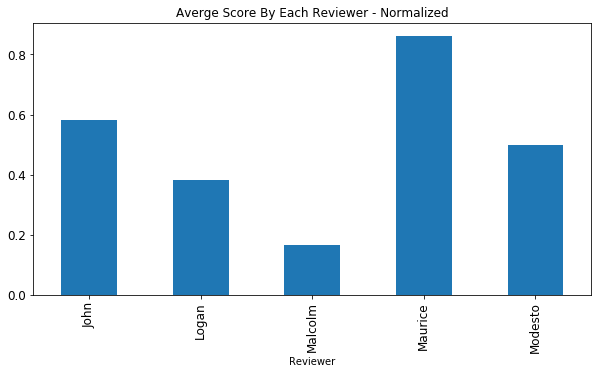

In [17]:
re_norm.plot(kind='bar', legend=False, fontsize=12, figsize=(10, 5))
plt.title('Averge Score By Each Reviewer - Normalized')

# Standardization

In [18]:
df

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,5.0,4.0,3,NaN,NaN,4.0
1,Logan,4.0,NaN,3,3.0,NaN,NaN
2,Modesto,NaN,NaN,4,NaN,4.0,4.0
3,Malcolm,NaN,NaN,2,NaN,4.0,NaN
4,Maurice,5.0,4.0,4,2.0,3.0,3.0


In [19]:
mov_std = df.fillna(0)

In [20]:
mov_std

,Reviewer,American Sniper,Edge Of Tomorrow,Groundhog Day,Jurassic World,Lost in Translation,Lucy
0,John,5.0,4.0,3,0.0,0.0,4.0
1,Logan,4.0,0.0,3,3.0,0.0,0.0
2,Modesto,0.0,0.0,4,0.0,4.0,4.0
3,Malcolm,0.0,0.0,2,0.0,4.0,0.0
4,Maurice,5.0,4.0,4,2.0,3.0,3.0


In [21]:
mov_std.std()

American Sniper        2.588436
Edge Of Tomorrow       2.190890
Groundhog Day          0.836660
Jurassic World         1.414214
Lost in Translation    2.049390
Lucy                   2.049390
dtype: float64

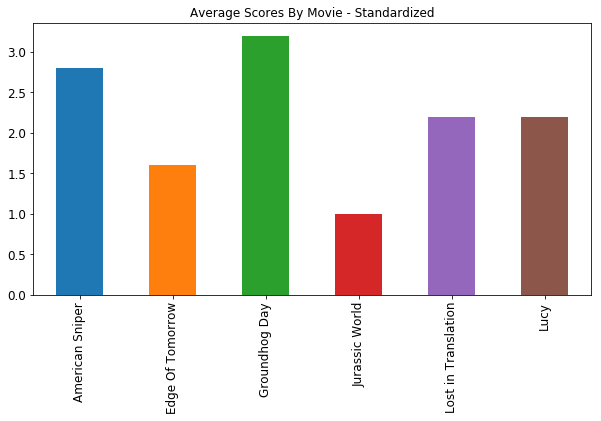

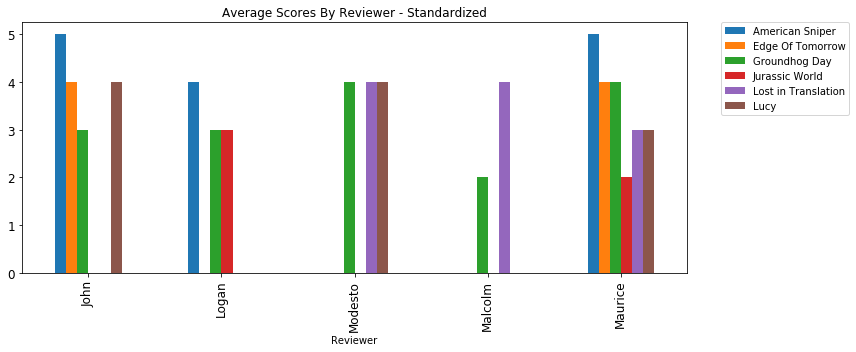

In [22]:
mov_std.mean().plot(kind='bar', x='Reviewer', fontsize=12, figsize=(10, 5))
plt.title('Average Scores By Movie - Standardized')


mov_std.plot(kind='bar', x='Reviewer', fontsize=12, figsize=(12, 5))
plt.title('Average Scores By Reviewer - Standardized')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

In [26]:
re_std = mov_std.set_index('Reviewer').stack().groupby(level=0).std().to_frame()

In [27]:
re_std

,0
Reviewer,
John,2.160247
Logan,1.861899
Malcolm,1.673320
Maurice,1.048809
Modesto,2.190890


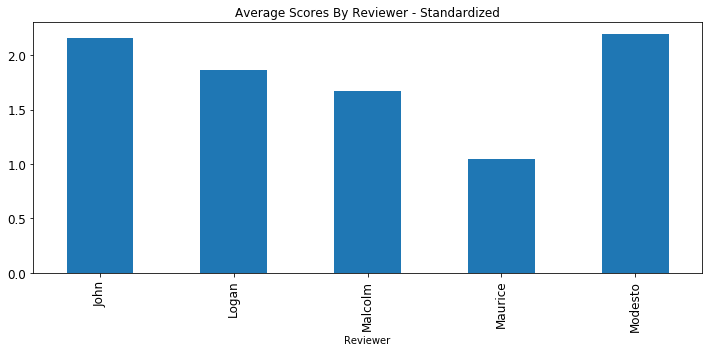

In [28]:
re_std.plot(kind='bar', fontsize=12, legend=False, figsize=(10, 5))
plt.title('Average Scores By Reviewer - Standardized')

plt.tight_layout()

# CONCLUSION

Normalization and standardization are better suited to large scale statistical datasets.

For this particular dataset, with only 6 columns and 5 rows of data. The actuale dataframe serves its purpose.

We can identify easily which reviewer has given which movie a rating between 1 to 5. A rating is absent if a reviewer have yet to see a particular movie. Which makes NaN a necessary part of this analysis.

With normalization, all the ratings are converted between 0 to 1. This gives a false impression of a 0 rating to movies that have yet to be reviewed. And several movies by several reviewers end up with a rating of 1. Again, not an accurate analysis either way.

With Standardization, again becasue this is such a small dataset, standardizing the data doesn't give an accurate analysis the moves and ratings.

For this assingment, the actuale data frame works best.